In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
permit_df = pd.read_csv('../data/raw/issued-building-permits.csv', sep=';', encoding='utf-8')

In [8]:
permit_df

,PermitNumber,PermitNumberCreatedDate,IssueDate,PermitElapsedDays,ProjectValue,TypeOfWork,Address,ProjectDescription,PermitCategory,Applicant,ApplicantAddress,PropertyUse,SpecificUseCategory,BuildingContractor,BuildingContractorAddress,IssueYear,GeoLocalArea,Geom,YearMonth,geo_point_2d
0,DB-2022-05477,2022-12-13,2023-06-01,170,179987.50,New Building,"108 W 45TH AVENUE #3, Vancouver, BC",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,QI LI DBA: LQ Design GROUP Ltd,"2161 LAWSON AVE \r\nWEST VANCOUVER, BC V7V 2E1",Dwelling Uses,Laneway House,NaN,NaN,2023,Oakridge,"{""coordinates"": [-123.1086422, 49.229261], ""ty...",2023-06,"49.229261, -123.1086422"
1,BP-2023-04066,2023-11-07,2024-04-24,169,900000.00,New Building,"7951 FRENCH STREET, Vancouver, BC V6P 4V8",High Density Housing / Commercial - New Buildi...,NaN,QI LI DBA: LQ Design GROUP Ltd,"2161 LAWSON AVE \r\nWEST VANCOUVER, BC V7V 2E1",Dwelling Uses,Multiple Dwelling,NaN,NaN,2024,Marpole,"{""coordinates"": [-123.1393874, 49.2137408], ""t...",2024-04,"49.2137408, -123.1393874"
2,DB-2024-02839,2024-07-29,2025-10-03,431,800000.00,New Building,"3563 W 32ND AVENUE, Vancouver, BC V6S 1Z1",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,QI LI DBA: LQ Design GROUP Ltd,"2161 LAWSON AVE \r\nWEST VANCOUVER, BC V7V 2E1",Dwelling Uses,Single Detached House w/Sec Suite,Vola Management Corporation,"1329 BALFOUR AV \r\nVancouver, BC V6H 1X8",2025,Dunbar-Southlands,"{""coordinates"": [-123.1838783, 49.2435833], ""t...",2025-10,"49.2435833, -123.1838783"
3,DB-2024-02404,2024-06-27,2024-11-22,148,880000.00,New Building,"3910 W 24TH AVENUE, Vancouver, BC V6S 1M2",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,QI LI DBA: LQ Design GROUP Ltd,"2161 LAWSON AVE \r\nWEST VANCOUVER, BC V7V 2E1",Dwelling Uses,"Duplex w/Secondary Suite,Secondary Suite",JETFINITY DESIGN BUILD INC.,NaN,2024,Dunbar-Southlands,"{""coordinates"": [-123.1912535, 49.2508193], ""t...",2024-11,"49.2508193, -123.1912535"
4,BP-2024-04723,2024-11-28,2025-06-23,207,0.00,New Building,"2816 GLEN DRIVE, Vancouver, BC V5T 4B8",High Density Housing / Commercial - New Buildi...,NaN,QI LI DBA: LQ Design GROUP Ltd,"2161 LAWSON AVE \r\nWEST VANCOUVER, BC V7V 2E1",Dwelling Uses,Single Detached House,NaN,NaN,2025,Mount Pleasant,"{""coordinates"": [-123.0814044, 49.2592904], ""t...",2025-06,"49.2592904, -123.0814044"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,DB-2018-00416,2018-01-25,2018-09-21,239,883000.00,New Building,"4857 TRAFALGAR STREET, Vancouver, BC V6L 2N1",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,Bryn Davidson DBA: Lanefab,"3728 Commercial St\r\nVancouver, BC V5N 4G2",Dwelling Uses,Single Detached House w/Sec Suite,Lanefab Design Build Ltd,"3728 COMMERCIAL ST \r\nVancouver, BC V5N 4G2",2018,Arbutus Ridge,"{""coordinates"": [-123.1659732, 49.242673], ""ty...",2018-09,"49.242673, -123.1659732"
49656,DB-2018-00419,2018-01-25,2018-09-21,239,225000.00,New Building,"4863 TRAFALGAR STREET, Vancouver, BC V6L 2N1",Low Density Housing - New Building - To constr...,New Build - Low Density Housing,Bryn Davidson DBA: Lanefab,"3728 Commercial St\r\nVancouver, BC V5N 4G2",Dwelling Uses,Laneway House,Lanefab Design Build Ltd,"3728 COMMERCIAL ST \r\nVancouver, BC V5N 4G2",2018,Arbutus Ridge,"{""coordinates"": [-123.1656234, 49.2426384], ""t...",2018-09,"49.2426384, -123.1656234"
49657,DB-2016-04667,2016-12-23,2017-08-21,241,221500.00,New Building,"333 E 18TH AVENUE, Vancouver, BC V5V 1E7",Low Density Housing - New Building - To constr...,New Build - Standalone Laneway,Bryn Davidson DBA: Lanefab,"3728 Commercial St\r\nVancouver, BC V5N 4G2",Dwelling Uses,Laneway House,Lanefab Design Build Ltd,"3728 COMMERCIAL ST \r\nVancouver, BC V5N 4G2",2017,Riley Park,"{""coordinates"": [-123.0971969, 49.2547684], ""t...",2017-08,"49.2547684, -123.0971969"
49658,BP-2019-02685,20

**User Story 4:**
As a city planner, I want to see a time series of permit volume per month or season, with the ability to forecast future building permits, so that I can detect seasonal patterns and plan departmental workload accordingly.

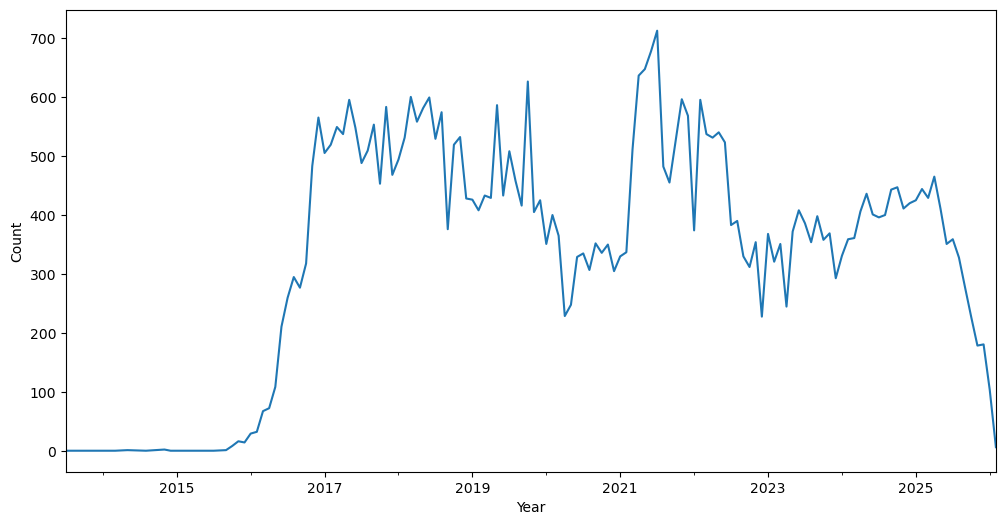

In [16]:
permit_df['PermitNumberCreatedDate'] = pd.to_datetime(permit_df['PermitNumberCreatedDate'])

plt.figure(figsize=(12, 6))
permit_df['PermitNumberCreatedDate'] = pd.to_datetime(permit_df['PermitNumberCreatedDate'])
permit_df.groupby(permit_df['PermitNumberCreatedDate'].dt.to_period('M')).size().plot()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

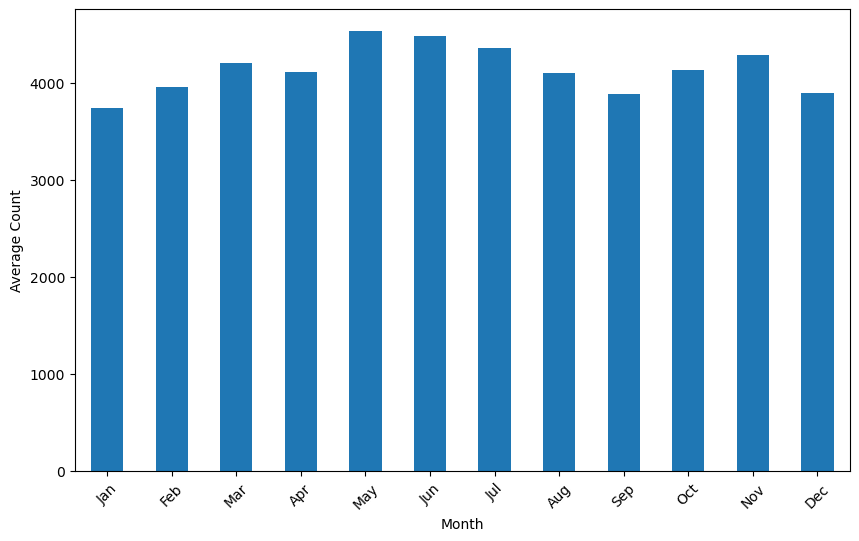

In [19]:
monthly_avg = permit_df.groupby(permit_df['PermitNumberCreatedDate'].dt.month).size()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()